<a href="https://colab.research.google.com/github/settyss/Price-Prediction-ML/blob/main/Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import sklearn

print("Environment ready!")


Environment ready!


In [2]:
import pandas as pd

df = pd.read_csv("precious_metals_historical_data.csv")
df.head()


,Date,Silver_Price,Gold_Price,Platinum_Price,Silver_Returns,Gold_Returns,Platinum_Returns,Gold_Silver_Ratio,Silver_Volatility_30d,Gold_Volatility_30d,Platinum_Volatility_30d,Silver_MA50,Silver_MA200,Gold_MA50,Gold_MA200
0,2016-02-03,13.95,109.250000,84.940002,NaN,NaN,NaN,7.831541,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016-02-04,14.17,110.570000,87.260002,0.015771,0.012082,0.027313,7.803105,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2016-02-05,14.34,112.320000,87.919998,0.011997,0.015827,0.007564,7.832636,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2016-02-08,14.59,113.830002,89.199997,0.017434,0.013444,0.014559,7.801919,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2016-02-09,14.51,113.580002,89.849998,-0.005483,-0.002196,0.007287,7.827705,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.isnull().sum()


,0
Date,0
Silver_Price,0
Gold_Price,0
Platinum_Price,0
Silver_Returns,1
Gold_Returns,1
Platinum_Returns,1
Gold_Silver_Ratio,0
Silver_Volatility_30d,30
Gold_Volatility_30d,30


In [5]:
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month


In [6]:
X = df[['Year', 'Month']]
y = df['Gold_Price']   # adjust column name


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LinearRegression()
model.fit(X_train, y_train)

preds = model.predict(X_test)

mae = mean_absolute_error(y_test, preds)
print("MAE:", mae)


MAE: 24.342540967947617


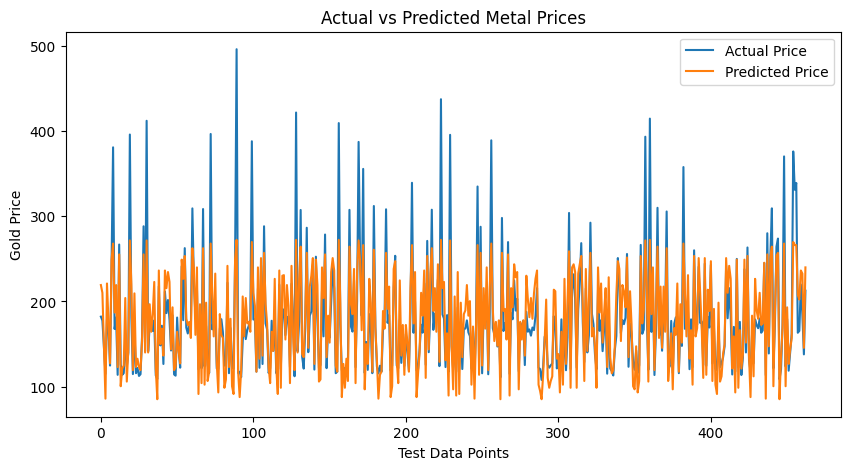

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(y_test.values, label="Actual Price")
plt.plot(preds, label="Predicted Price")
plt.xlabel("Test Data Points")
plt.ylabel("Gold Price")
plt.title("Actual vs Predicted Metal Prices")
plt.legend()
plt.show()


In [4]:
df = df.dropna()
